# Bias-Variance Tradeoff

## Introduction

You've seen how you can extend your linear models by including interaction effects as well as polynomial terms. Including these in models comes at a price though: not only do the models become more complex (with more parameter estimates), adding more terms can potentially harm model performance when performing predictions. You'll learn about that in this lesson.

## Objectives

You will be able to:

- Describe the bias-variance tradeoff in machine learning 
- Discuss how bias and variance are related to over and underfitting 
- List the three components of error 

## Using models for prediction

You have learned earlier how to use regression models for predictions. This is without any doubt one of the main reasons why regressions models are used. 

When building models for predicting, we have previously seen how we need to create a train test split in order to keep ourselves honest in tuning our model to the data itself. Not doing this can lead to dramatic results. Let's reuse the `'Yield'` dataset used in the polynomial regression lesson (the data was slightly altered, but very similar to what we've seen before). Let's visualize the whole dataset.

   Temp  Yield
i             
1    50    3.3
2    54    3.4
3    57    3.1
4    60    3.2
5    63    3.1


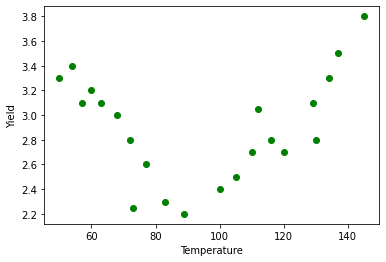

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

yld = pd.read_csv('yield2.csv', sep='\s+', index_col = 0)

print(yld.head())
y = yld['Yield']
X = yld['Temp']

plt.scatter(X, y, color = 'green')
plt.xlabel('Temperature')
plt.ylabel('Yield');

There seems to be a downward trend first, then upwards. Let's split this dataset in a training set, containing 70% of the observations, and a test set, containing 30% of the observations. 

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=34567)

In [3]:
reg = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)

When plotting a simple linear regression model there are no unexpected results: the line is a bad fit, both for training and test set.

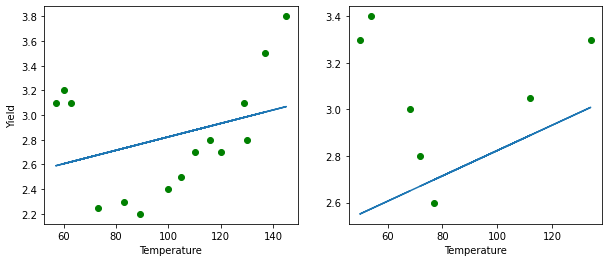

In [4]:
# Plot the simple model
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train.values.reshape(-1, 1), reg.predict(X_train.values.reshape(-1, 1)))
plt.xlabel('Temperature')
plt.ylabel('Yield')

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test.values.reshape(-1, 1), reg.predict(X_test.values.reshape(-1, 1)))
plt.xlabel('Temperature');

When including polynomials, however, the result changes. We included a polynomial of 6 here. The result seems to be very accurate for the training set, but the picture is definitely different for the test set on the right-hand side. Where the fit seemed to be good for the training set, the test set fit is not nearly as good. The problem is that our model did *not generalize well* to cases outside the training set.

In [5]:
# 6th degree polynomial
poly = PolynomialFeatures(6)
X_fin = poly.fit_transform(X_train.values.reshape(-1, 1))
reg_poly = LinearRegression().fit(X_fin, y_train)

In [6]:
X_linspace = pd.DataFrame(np.linspace(50, 145, 50), columns=['Temp'])

X_linspace_fin = poly.fit_transform(X_linspace)
y_poly_pred = reg_poly.predict(X_linspace_fin)

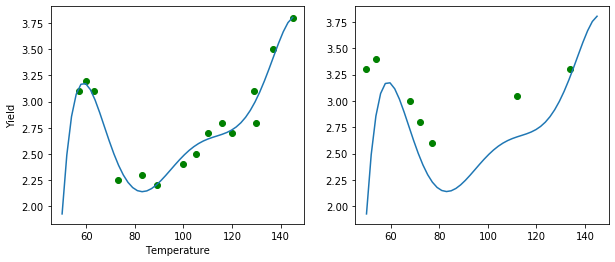

In [7]:
# Plot 6th degree polynomial fit
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='green')
plt.plot(X_linspace, y_poly_pred)
plt.xlabel('Temperature')
plt.ylabel('Yield')

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green')
plt.plot(X_linspace, y_poly_pred);

Let's have a look at the mean squared error:

In [7]:
X_fin_test = poly.fit_transform(X_test.values.reshape(-1, 1))
y_pred = reg_poly.predict(X_fin_test)
mean_squared_error(y_test, y_pred)

0.3816680068336337

## Underfitting and Overfitting

Let's formalize this:


> *Underfitting* happens when a model cannot learn the training data, nor can it generalize to new data.

The simple linear regression model fitted earlier was an underfit model.

> *Overfitting* happens when a model learns the training data too well. In fact, so well that it is not generalizeable to new data 

The 6-degree polynomial was overfitted. Now, let's have a look at the same plots but with second degree polynomial.

In [8]:
# 2nd degree polynomial
poly = PolynomialFeatures(2)  
X_fin = poly.fit_transform(X_train.values.reshape(-1, 1))
reg_poly = LinearRegression().fit(X_fin, y_train)

In [9]:
X_linspace_fin = poly.fit_transform(X_linspace)
y_poly_pred = reg_poly.predict(X_linspace_fin)

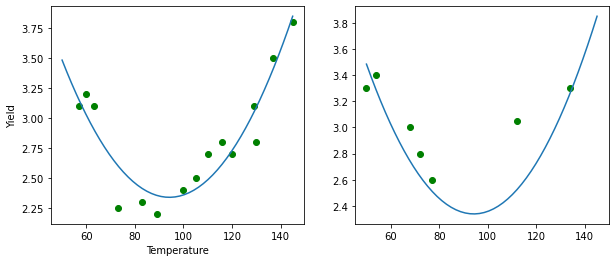

In [10]:
# Plot 2nd degree polynomial fit
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='green')
plt.plot(X_linspace, y_poly_pred)
plt.xlabel('Temperature')
plt.ylabel('Yield')

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green')
plt.plot(X_linspace, y_poly_pred);

In [11]:
X_fin_test = poly.fit_transform(X_test.values.reshape(-1, 1))
y_pred = reg_poly.predict(X_fin_test)
mean_squared_error(y_test, y_pred)

0.06124237736142769

The fit for the training set became worse, but we can clearly see how the test set performance improved by looking at the mean squared error. Also, it seems like the results for training and test set are comparable, which is what you would want in general.

## Bias-variance tradeoff

Another perspective on this problem of overfitting versus underfitting is the bias-variance tradeoff. The idea is that We can decompose the mean squared error as the sum of: 

- *bias*
- *variance*, and
- *irreducible error* 

Formally, this is written as: 
$ MSE = Bias(\hat{f}(x))^2 + Var(\hat{f}(x)) + \sigma^2$. The derivation of this result can be found on the Wikipedia page of the bias-variance trade-off, [here](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff#Derivation).

<img src="./images/new_bias_variance.png" alt="Drawing" width="500">

- Bias arises when wrong assumptions are made when training a model. For example, an interaction effect is missed, or we didn't catch a certain polynomial relationship. Because of this, our algorithm misses the relevant relations between predictors and the target variable. Note how this is similar to underfitting!

- Variance arises  when a model is too sensitive to small fluctuations in the training set. When variance is high, random noise in the training data is modeled, rather than the intended outputs. This is overfitting!

The balance between bias and variance is a trade-off. We can reduce the variance but then there is a risk of running a bigger bias, and vice versa. Bias is usually associated with low model complexity, variance with high model complexity. There is generally a "sweet spot" in-between, compromising between bias and variance. Read the additional resource below for more insights!

## Additional resources

https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

## Summary

Great, now you know what bias-variance tradeoff is, what underfitting and overfitting are, and how all of these relate, let's dive in for some practice!